In [1]:
# Download mnist dataset
import torch
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
mnist = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)



In [2]:
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    if torch.cuda.is_available(): 
        return torch.device("cuda")
    return torch.device("cpu")

device = get_device()
device

device(type='mps')

In [3]:
# Split data into training and validation sets
# Use 80% for training and 20% for validation
from torch.utils.data import random_split
train_size = int(0.8 * len(mnist))
val_size = int(0.1*len(mnist))
test_size = len(mnist) - train_size - val_size
mnist_train, mnist_val, mnist_test = random_split(mnist, [train_size, val_size, test_size])

train_loader = DataLoader(mnist_train, batch_size=4096, shuffle=True, num_workers=1)
val_loader = DataLoader(mnist_val, batch_size=4096, num_workers=1) 
test_loader = DataLoader(mnist_test, batch_size=4096, num_workers=1)

In [4]:
# Show the size and shape and datatype of the dataset
print("Number of training samples:", len(mnist_train))
print("Shape of each sample:", mnist.data[0].shape)
print("Number of validation samples:", len(mnist_val))
print("Data type of each sample:", mnist.data[0].dtype)
print("Data type of labels:", mnist.targets.dtype)


Number of training samples: 48000
Shape of each sample: torch.Size([28, 28])
Number of validation samples: 6000
Data type of each sample: torch.uint8
Data type of labels: torch.int64


In [5]:
# Show memory used by the dataset
# Show memory used by the dataset
print("Memory used by training set:", mnist.data.element_size() * mnist.data[mnist_train.indices].nelement() / (1024 ** 2), "MB")
print("Memory used by validation set:", mnist.data.element_size() * mnist.data[mnist_val.indices].nelement() / (1024 ** 2), "MB")

Memory used by training set: 35.888671875 MB
Memory used by validation set: 4.486083984375 MB


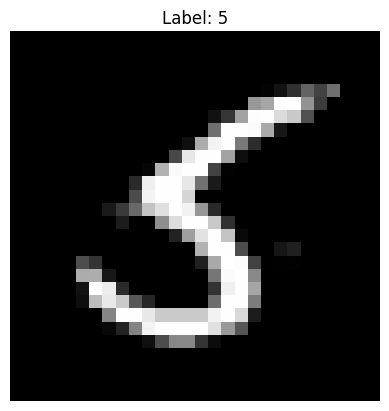

In [6]:
# Visualise a random image
import matplotlib.pyplot as plt
import numpy as np
import random
image, label = random.choice(mnist)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [7]:
# Could use lightning here but we're keeping it simple so pure PyTorch.

import torch.nn as nn
import torch.nn.functional as F

class SimplestNN(torch.nn.Module):
    def __init__(self):
        super(SimplestNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = x.float()
        return self.layers(x)

In [8]:

import torch.optim as optim
model = SimplestNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model = model.to(device)


val_batch, val_target = next(iter(val_loader))
val_batch, val_target = val_batch.to(device), val_target.to(device)
val_outputs = model(val_batch) 
val_loss = criterion(val_outputs, val_target)
print("Validation Loss before training :", val_loss.item()) 


Validation Loss before training : 2.3018085956573486


In [9]:
epochs = 100
for epoch in range(epochs): 
    model.eval()  # Set the model to evaluation mode
    print(f'Epoch {epoch+1}/{epochs}')
    #Validate the model
    with torch.no_grad():
        #Loop through the validation set
        val_loss = 0
        batches = len(val_loader)
        for val_batch, val_target in val_loader:
            val_batch, val_target = val_batch.to(device), val_target.to(device)
            val_outputs = model(val_batch) 
            val_loss += criterion(val_outputs, val_target)
        print(f'Epoch {epoch+1}/{epochs} validation Loss: {val_loss.item() / batches:.4f}')

    model.train() # Set the model to training mode
    optimizer.zero_grad()
    for batch_data, batch_target in train_loader:
        batch_data = batch_data.to(device)
        batch_target = batch_target.to(device)

        outputs = model(batch_data)
        loss = criterion(outputs, batch_target)
        loss.backward()
    optimizer.step()

Epoch 1/100
Epoch 1/100 validation Loss: 2.3021
Epoch 2/100
Epoch 2/100 validation Loss: 2.2428
Epoch 3/100
Epoch 3/100 validation Loss: 2.1843
Epoch 4/100
Epoch 4/100 validation Loss: 2.1233
Epoch 5/100
Epoch 5/100 validation Loss: 2.0590
Epoch 6/100
Epoch 6/100 validation Loss: 1.9921
Epoch 7/100
Epoch 7/100 validation Loss: 1.9233
Epoch 8/100
Epoch 8/100 validation Loss: 1.8531
Epoch 9/100
Epoch 9/100 validation Loss: 1.7821
Epoch 10/100
Epoch 10/100 validation Loss: 1.7110
Epoch 11/100
Epoch 11/100 validation Loss: 1.6404
Epoch 12/100
Epoch 12/100 validation Loss: 1.5706
Epoch 13/100
Epoch 13/100 validation Loss: 1.5019
Epoch 14/100
Epoch 14/100 validation Loss: 1.4347
Epoch 15/100
Epoch 15/100 validation Loss: 1.3693
Epoch 16/100
Epoch 16/100 validation Loss: 1.3061
Epoch 17/100


Traceback (most recent call last):
  File "<frozen importlib._bootstrap_external>", line 1489, in _path_importer_cache
KeyError: '/Users/jamespjh/devel/stubs/languages/python/learning/venv/lib/python3.12/site-packages/torch/_dynamo/variables'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/homebrew/Cellar/python@3.12/3.12.12_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.12/3.12.12_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jamespjh/devel/stubs/languages/python/learning/venv/lib/python3.12/site-packages/torchvision/__init__.py", li

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/jamespjh/devel/stubs/languages/python/learning/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/05/j3_f39wd2qng8h8gcx6q_mr00000gn/T/ipykernel_85013/1829819247.py", line 10, in <module>
    for val_batch, val_target in val_loader:
                                 ^^^^^^^^^^
  File "/Users/jamespjh/devel/stubs/languages/python/learning/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 741, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/Users/jamespjh/devel/stubs/languages/python/learning/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1524, in _next_data
    idx, data = self._get_data()
                ^^^^^^^^^^^^^^^^
  File "/Users/jamespjh/devel/stubs/languages/python/learning/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py", 

In [ ]:
val_outputs = model(val_data)
val_loss = criterion(val_outputs, val_targets)
print("Validation Loss:", val_loss.item())

Validation Loss: 0.26385343074798584


In [ ]:
test_outputs = model(test_data.to(device))
test_targets = test_targets.to(device)
# Print how many in the test set are classified incorrectly
correct_predictions = (torch.argmax(test_outputs, dim=1) == test_targets).sum().item()
total_predictions = test_targets.size(0)
incorrect_predictions = total_predictions - correct_predictions
print(f'Incorrect predictions in the test set: {incorrect_predictions} out of {total_predictions}')

Incorrect predictions in the test set: 468 out of 6000


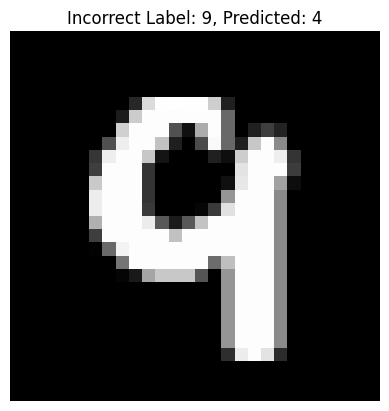

In [ ]:
# Show the first incorrect prediction as an image
test_images = torch.cat([batch[0] for batch in test_loader], dim=0)
incorrect_indices = (torch.argmax(test_outputs,dim=1) != test_targets).nonzero(as_tuple=True)[0]
if incorrect_indices.numel() > 0:
    first_incorrect_index = incorrect_indices[0]
    incorrect_image = test_images[first_incorrect_index].flatten(0,1)
    incorrect_label = test_targets[first_incorrect_index].item()
    predicted_label = torch.argmax(test_outputs,dim=1)[first_incorrect_index].item()

    plt.imshow(incorrect_image, cmap='gray')
    plt.title(f'Incorrect Label: {incorrect_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()